In [1]:
# Dependencies and Setup
# Pandas dependency
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load clean data CSV file created in Part 1 into a Pandas DataFrame
df = pd.read_csv("../Resources/Diversity_in_tech_companies_clean_data.csv")

# Display sample data
df.head(10)

,Unnamed: 0,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [3]:
# Examine data and datatypes
print(df.shape)
print(df.info())
print(df.describe())

(91, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         91 non-null     int64  
 1   Year               91 non-null     int64  
 2   Company            91 non-null     object 
 3   Female %           91 non-null     float64
 4   Male %             91 non-null     float64
 5   % White            91 non-null     float64
 6   % Asian            91 non-null     float64
 7   % Latino           91 non-null     float64
 8   % Black            91 non-null     float64
 9   % Multi            91 non-null     float64
 10  % Other            91 non-null     float64
 11  % Undeclared       91 non-null     float64
 12  Gender Total %     91 non-null     float64
 13  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 10.1+ KB
None
       Unnamed: 0         Year   Female %     Male 

## Standarize colors on all charts

In [4]:
diversity_colors = {'% White':'#EC111A', 
          '% Asian':'#F2609E', 
          '% Black':'#FFD42F', 
          '% Latino':'#138468', 
          '% Multi':'#009DD6', 
          '% Other':'#FB6330', 
          '% Undeclared':'#7849B8'}
gender_colors = ['lightblue', 'pink']

## Question 3: How do Black and Latino people compare over time?

In [5]:
# Creating df per black and per latino per year
average_df = df.pivot_table(index='Year', values=['% Latino', '% Black'], aggfunc='mean') 
average_df

,% Black,% Latino
Year,,
2014,5.000000,7.125000
2015,5.000000,6.941176
2016,5.277778,6.944444
2017,6.055556,7.555556
2018,5.818182,7.636364


In [6]:
black_percent = average_df['% Black'].to_list()
type(black_percent)

list

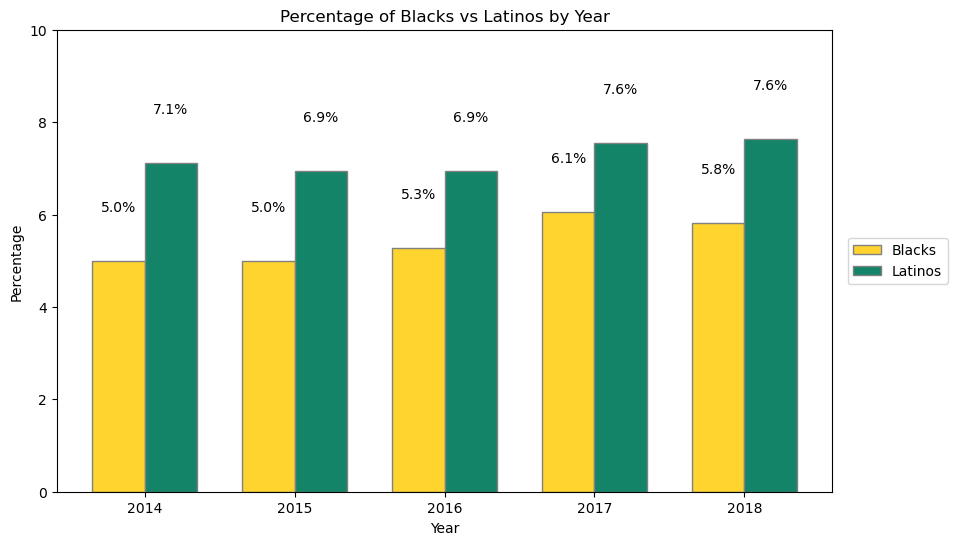

In [7]:
# Creating double bar graph for black and latino per year
# Defining the values
years = average_df.index
black_percent = average_df['% Black'].to_list()
latino_percent = average_df['% Latino'].to_list()
black_color = diversity_colors['% Black'] 
latino_color = diversity_colors['% Latino']

# Set the width of the bars
bar_width = 0.35
plt.figure(figsize=(10, 6))

# Set the position of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create a bar chart with bars next to each other
plt.bar(r1, black_percent, color=black_color, width=bar_width, edgecolor='grey', label='Blacks')
plt.bar(r2, latino_percent, color=latino_color, width=bar_width, edgecolor='grey', label='Latinos')

# Add labels for the percentages
for i in range(len(years)):
    plt.text(r1[i], black_percent[i] + 1, f"{np.round(black_percent[i],1)}%", ha='center', va='bottom', color='black')
    plt.text(r2[i], latino_percent[i] + 1, f"{np.round(latino_percent[i],1)}%", ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Blacks vs Latinos by Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend(loc = (1.02, 0.45))
plt.ylim(0, 10)


# Show the plot
plt.savefig("./images/BlacksVsLatinos.png")
plt.show()